# This is my workbook in which i will be analysing the stuff.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\CM-Ajk\AppData\Local\Temp\ipykernel_11780\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
videos_stats = pd.read_csv('videos_stats.csv')
videos_stats.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,23/08/2022,tech,3407.0,672.0,135612.0
1,The most EXPENSIVE thing I own.,b3x28s61q3c,24/08/2022,tech,76779.0,4306.0,1758063.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,23/08/2022,tech,63825.0,3338.0,1564007.0
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,23/08/2022,tech,71566.0,1426.0,922918.0
4,Best Back to School Tech 2022!,ErMwWXQxHp0,08/08/2022,tech,96513.0,5155.0,1855644.0


In [3]:
Comments = pd.read_csv('comments.csv')
Comments.head()

,Video ID,Comment,Likes,Sentiment
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95,1
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19,0
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161,2
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8,0
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34,2


In [4]:
keywords=[]
for key in videos_stats['Keyword']:
    if key in keywords:
        pass
    else:
        keywords.append(key)

In [5]:
count = 0
for key in keywords:
    count = count+1
    print(count, key)

1 tech
2 news
3 gaming
4 sports
5 how-to
6 business
7 tutorial
8 finance
9 crypto
10 cubes
11 chess
12 apple
13 google
14 interview
15 history
16 literature
17 bed
18 trolling
19 asmr
20 music
21 food
22 mukbang
23 reaction
24 lofi
25 animals
26 education
27 minecraft
28 sat
29 mrbeast
30 cnn
31 mathchemistry
32 biology
33 physics
34 computer science
35 nintendo
36 xbox
37 marvel
38 movies
39 data science
40 game development
41 machine learning


In [6]:
grouped_data = videos_stats.groupby('Keyword')
keyword_data = {}
for keyword, group_data in grouped_data:
    likes = group_data['Likes'].fillna(0).tolist()
    comments = group_data['Comments'].fillna(0).tolist()
    views = group_data['Views'].fillna(0).tolist()
    keyword_data[keyword] = {
        'likes' : likes,
        'comments' : comments,
        'views' : views
    }


In [7]:
keywords_data_summed = {}

for keyword in keyword_data:
    
    likes_count = keyword_data[keyword]['likes']
    comments_count = keyword_data[keyword]['comments']
    views_count = keyword_data[keyword]['views']
    
    counted_likes = np.sum(likes_count)
    counted_comments = np.sum(comments_count)
    counted_views = np.sum(views_count)
    
    keywords_data_summed[keyword] = {
        'total_likes' : counted_likes,
        'total_comments' : counted_comments,
        'total_views' : counted_views
    }

print(keywords_data_summed['machine learning'])

{'total_likes': 1693347.0, 'total_comments': 59301.0, 'total_views': 63004908.0}


In [8]:
keyword_likes_list = [(keyword, likes['total_likes']) for keyword, likes in keywords_data_summed.items()]
sorted_keywords_likes_list = sorted(keyword_likes_list, key=lambda x: x[1], reverse=True)

sorted_keywords_likes_list

[('mrbeast', 105295718.0),
 ('animals', 28909480.0),
 ('google', 21202537.0),
 ('bed', 20842016.0),
 ('cubes', 15153060.0),
 ('music', 14452653.0),
 ('history', 13670533.0),
 ('marvel', 10518960.0),
 ('tutorial', 8386044.0),
 ('how-to', 7627111.0),
 ('mukbang', 6363299.0),
 ('apple', 4959314.0),
 ('physics', 4935045.0),
 ('food', 4560703.0),
 ('sports', 4435425.0),
 ('reaction', 3697989.0),
 ('interview', 3666347.0),
 ('business', 3455285.0),
 ('biology', 3124738.0),
 ('trolling', 3069352.0),
 ('minecraft', 3058978.0),
 ('lofi', 3010876.0),
 ('tech', 2905652.0),
 ('nintendo', 2139530.0),
 ('xbox', 1902183.0),
 ('asmr', 1830765.0),
 ('chess', 1693992.0),
 ('machine learning', 1693347.0),
 ('computer science', 1615850.0),
 ('sat', 1520509.0),
 ('education', 1495016.0),
 ('mathchemistry', 1407730.0),
 ('movies', 1384796.0),
 ('game development', 1308934.0),
 ('gaming', 1070583.0),
 ('data science', 858789.0),
 ('literature', 819969.0),
 ('finance', 516184.0),
 ('cnn', 441787.0),
 ('crypto

In [9]:
keywords_comments_lists = [(keyword, comments['total_comments']) for keyword, comments in keywords_data_summed.items()]
sorted_keywords_comments_list = sorted(keywords_comments_lists, key=lambda x: x[1], reverse=True)
sorted_keywords_comments_list

[('mrbeast', 4797224.0),
 ('google', 1019079.0),
 ('history', 1009501.0),
 ('animals', 831129.0),
 ('bed', 667962.0),
 ('music', 565291.0),
 ('marvel', 485034.0),
 ('tutorial', 396770.0),
 ('cnn', 378737.0),
 ('apple', 361992.0),
 ('cubes', 341654.0),
 ('mukbang', 335312.0),
 ('how-to', 333669.0),
 ('interview', 271412.0),
 ('food', 265114.0),
 ('physics', 222060.0),
 ('biology', 201745.0),
 ('sports', 187573.0),
 ('nintendo', 177347.0),
 ('reaction', 162336.0),
 ('movies', 155742.0),
 ('trolling', 152841.0),
 ('tech', 151304.0),
 ('minecraft', 142186.0),
 ('xbox', 140651.0),
 ('sat', 99347.0),
 ('education', 98723.0),
 ('lofi', 98397.0),
 ('business', 88339.0),
 ('mathchemistry', 80532.0),
 ('chess', 69199.0),
 ('game development', 68817.0),
 ('asmr', 61365.0),
 ('machine learning', 59301.0),
 ('gaming', 59207.0),
 ('computer science', 56197.0),
 ('news', 46154.0),
 ('finance', 42277.0),
 ('literature', 40473.0),
 ('crypto', 27331.0),
 ('data science', 25876.0)]

In [10]:
keywords_views_list = [(keyword, views['total_views']) for keyword, views in keywords_data_summed.items()]
sorted_keywords_views_list  = sorted(keywords_views_list, key = lambda x:x[1], reverse=True)
sorted_keywords_views_list

[('google', 4651423680.0),
 ('animals', 3599510515.0),
 ('mrbeast', 3338200199.0),
 ('bed', 2371302059.0),
 ('music', 1350785090.0),
 ('history', 752356506.0),
 ('cubes', 751936967.0),
 ('mukbang', 490714756.0),
 ('apple', 451371079.0),
 ('sports', 421459032.0),
 ('how-to', 374845676.0),
 ('business', 347345017.0),
 ('tutorial', 338051601.0),
 ('marvel', 330703978.0),
 ('food', 252115500.0),
 ('movies', 215488638.0),
 ('biology', 193715474.0),
 ('physics', 184619364.0),
 ('lofi', 163588861.0),
 ('interview', 148305593.0),
 ('tech', 92102733.0),
 ('minecraft', 90638537.0),
 ('asmr', 85330791.0),
 ('xbox', 83495065.0),
 ('nintendo', 79922028.0),
 ('trolling', 71007051.0),
 ('education', 64426388.0),
 ('machine learning', 63004908.0),
 ('chess', 62194816.0),
 ('computer science', 57214018.0),
 ('sat', 52227567.0),
 ('mathchemistry', 49921879.0),
 ('literature', 39698977.0),
 ('game development', 36234427.0),
 ('reaction', 31158623.0),
 ('cnn', 27712019.0),
 ('data science', 27238599.0),
 

In [11]:
top_ten_keywords_views = sorted_keywords_views_list[:10]
top_ten_keywords_likes = sorted_keywords_likes_list[:10]
top_ten_keywords_comments = sorted_keywords_comments_list[:10]

views_keywords = [item[0] for item in top_ten_keywords_views]
views_counts = [item[1]/ 1e9 for item in top_ten_keywords_views]

likes_keywords = [item[0] for item in top_ten_keywords_likes]
likes_counts = [item[1]/1_000_000 for item in top_ten_keywords_likes]

comments_keywords = [item[0] for item in top_ten_keywords_comments]
comments_counts = [item[1]/1_000_000 for item in top_ten_keywords_comments]

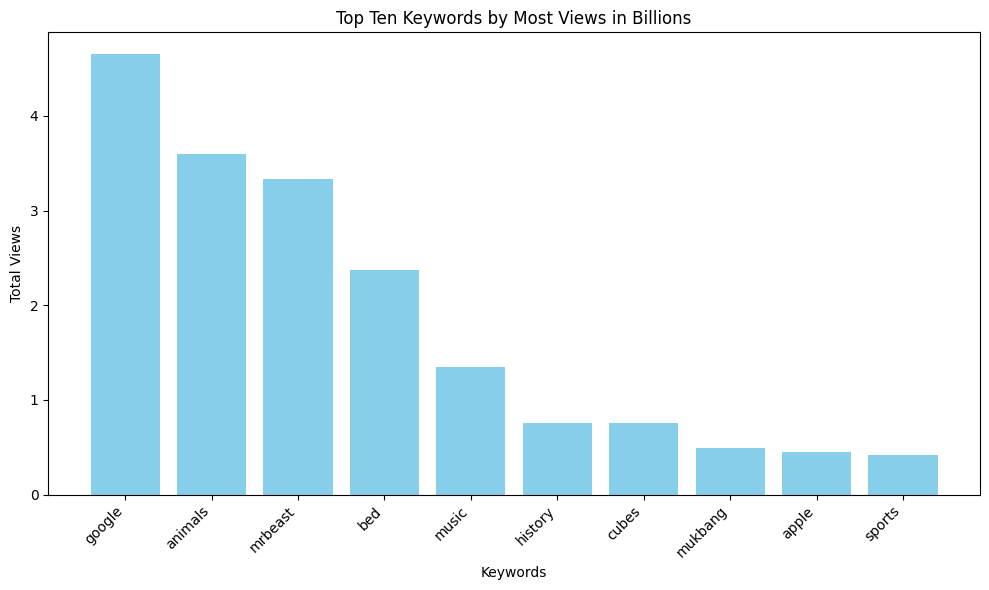

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(views_keywords, views_counts, color='skyblue')
plt.xlabel('Keywords')
plt.ylabel('Total Views')
plt.title('Top Ten Keywords by Most Views in Billions')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

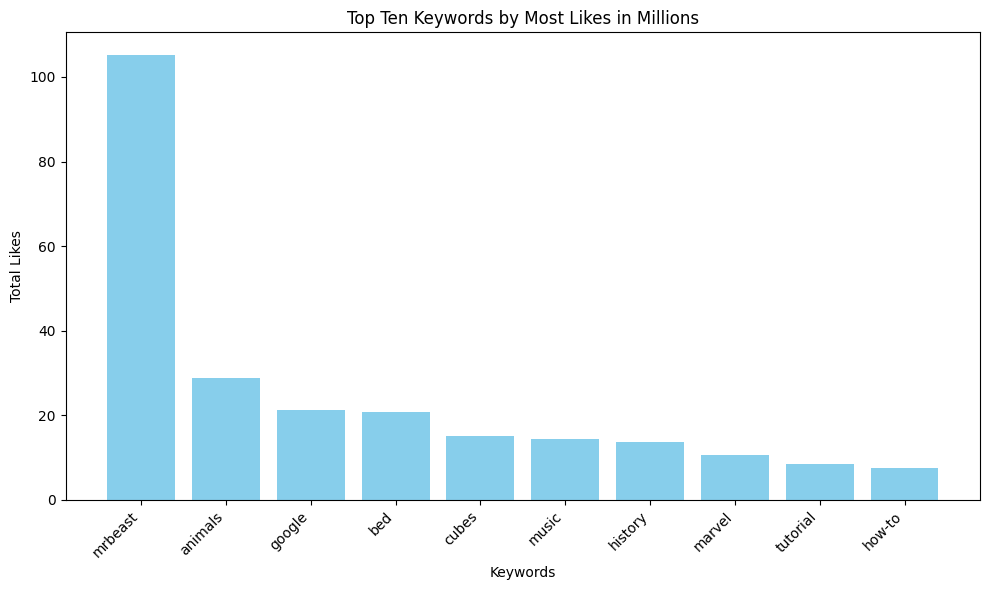

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(likes_keywords, likes_counts, color='skyblue')
plt.xlabel('Keywords')
plt.ylabel('Total Likes')
plt.title('Top Ten Keywords by Most Likes in Millions')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

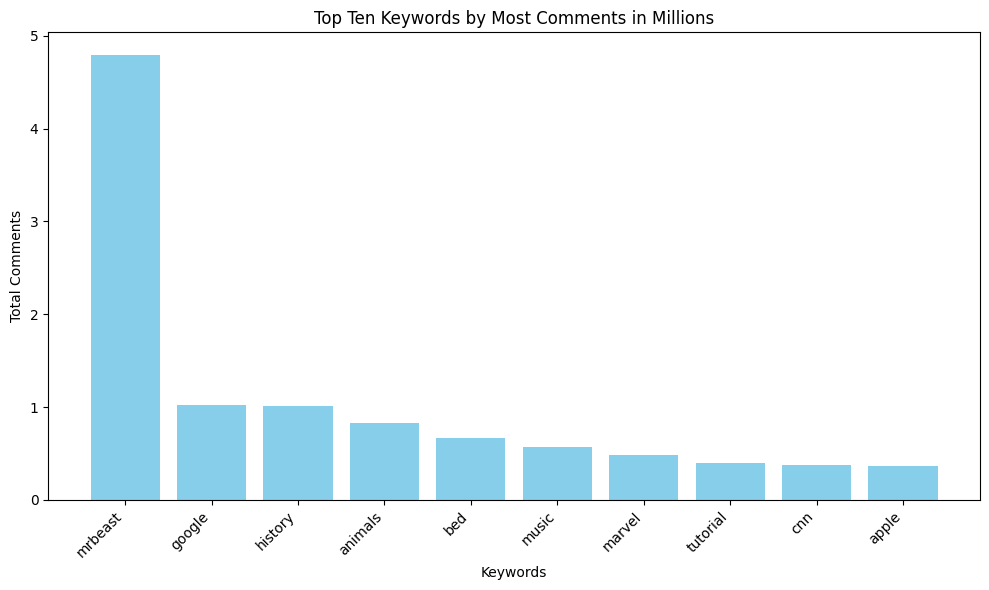

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(comments_keywords, comments_counts, color='skyblue')
plt.xlabel('Keywords')
plt.ylabel('Total Comments')
plt.title('Top Ten Keywords by Most Comments in Millions')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**👀 Most Viewed Keywords 🌟**

Discover the keywords that captivate audiences with their popularity and engagement! 🚀

1. *Google* 🌐 - It has around 4.6B views, making it a powerhouse in online searches and digital landscapes.

2. *Animals* 🐾 - Videos featuring the keyword "Animal" have amassed around 3.5B views, showcasing the universal appeal of nature and wildlife.

3. *MrBeast* 💥 - Content associated with MrBeast has garnered over 3.3B views, highlighting the captivating and dynamic nature of this content creator's videos.

4. *Bed* 🛏️ - Explore the secrets of comfort and relaxation with bed-related content, accumulating an impressive viewership -- 2.3.

5. *Music* 🎵 - Immerse yourself in the enchanting world of melodies and rhythms with music-themed videos, accumulating over 1.3B views.

These keywords represent a diverse range of interests and topics that resonate strongly with online audiences, capturing their attention and engagement.

---

**👍 Liked Content Analysis based on Keywords 💖**

Explore the content that receives the most love and appreciation from viewers! ❤️

1. *MrBeast* 💰 - Experience the thrill of generosity and entertainment with MrBeast's captivating videos, boasting an impressive 105M likes.

2. *Animals* 🐼 - Delight in the wonders of the animal kingdom as viewers show their love for furry friends, accumulating a remarkable 28M likes.

3. *Google* 📈 - Discover the power of information and innovation with Google's liked content, amassing an astounding 21M likes.

4. *Bed* 🌙 - Indulge in comfort and relaxation as viewers express their appreciation for bed-related content, garnering an impressive 20M likes.

5. *Cubes* 🔷 - Unlock the mystery and fascination surrounding cube-related content with high likes, accumulating an appreciable 15M likes.

These top liked content keywords represent a diverse array of interests, from entertainment and education to comfort and curiosity, resonating strongly with audiences and earning their heartfelt appreciation.


---

**💬 Commented Content Insights based on Keywords 💬**

Explore the keywords that spark discussions and conversations around popular content! 🗣️

1. *MrBeast* 💬 - Engage in lively discussions and reactions to MrBeast's innovative and entertaining content, with a staggering 4M comments.

2. *Google* 💭 - Explore the diverse perspectives and opinions shared in response to Google's content, generating insightful discussions with over 1M comments.

3. *History* 📜 - Delve into the past and exchange thoughts on historical events and narratives, stimulating intellectual discourse with 1M comments.

4. *Animals* 🗨️ - Join the conversation about wildlife and nature's wonders, sparked by animal-themed content, with engaging discussions totaling 831K comments.

5. *Bed* 💬 - Share experiences and opinions on topics related to comfort, relaxation, and sleep, fostering community interactions with 667K comments.

These keywords serve as catalysts for meaningful discussions and exchanges of ideas, enriching the online discourse with diverse perspectives and insights.


---

In [15]:
videos_stats['Industry'] = ''
videos_stats.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,Industry
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,23/08/2022,tech,3407.0,672.0,135612.0,
1,The most EXPENSIVE thing I own.,b3x28s61q3c,24/08/2022,tech,76779.0,4306.0,1758063.0,
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,23/08/2022,tech,63825.0,3338.0,1564007.0,
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,23/08/2022,tech,71566.0,1426.0,922918.0,
4,Best Back to School Tech 2022!,ErMwWXQxHp0,08/08/2022,tech,96513.0,5155.0,1855644.0,


In [16]:
keywords_industries = {
    'tech': ['Technology', 'Computer'],
    'news': ['Media', 'Entertainment', 'Television'],
    'gaming': ['Entertainment', 'Technology'],
    'sport': ['Entertainment', 'Television'],
    'how-to': ['Education'],
    'business': ['Marketing', 'Advertising', 'Investment','Business'],
    'tutorial': ['Education'],
    'finance': ['Investment', 'Business'],
    'crypto': ['Investment', 'Technology'],
    'cubes': ['Entertainment'],
    'chess': ['Entertainment', 'Education'],
    'apple': ['Technology', 'Marketing', 'Advertising', 'Computer'],
    'google': ['Technology', 'Marketing', 'Advertising', 'Computer'],
    'interview': ['Media', 'Marketing', 'Advertising'],
    'history': ['Education', 'Research'],
    'literature': ['Art', 'Education'],
    'bed': ['Design'],
    'trolling': ['Entertainment', 'Internet'],
    'asmr': ['Entertainment', 'Sound Recording and Reproduction', 'Health'],
    'music': ['Music', 'Sound Recording and Reproduction', 'Entertainment'],
    'food': ['Entertainment', 'Health'],
    'mukbang': ['Entertainment', 'Food'],
    'reaction': ['Entertainment', 'Media'],
    'lofi': ['Music', 'Sound Recording and Reproduction'],
    'animals': ['Education', 'Entertainment'],
    'education': ['Education', 'Research'],
    'minecraft': ['Entertainment'],
    'sat': ['Education'],
    'mrbeast': ['Entertainment'],
    'cnn': ['Media', 'Television'],
    'mathchemistry': ['Education', 'Research'],
    'biology': ['Education', 'Research'],
    'physics': ['Education', 'Research'],
    'computer science': ['Technology', 'Education', 'Software'],
    'nintendo': ['Entertainment'],
    'xbox': ['Entertainment'],
    'marvel': ['Entertainment'],
    'movies': ['Entertainment', 'Video Production', 'Art'],
    'data science': ['Technology', 'Research', 'Computer', 'Artificial Intelligence'],
    'game development': ['Technology', 'Software', 'Education'],
    'machine learning': ['Artificial Intelligence', 'Research', 'Technology', 'Computer']
}

In [17]:
videos_stats.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,Industry
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,23/08/2022,tech,3407.0,672.0,135612.0,
1,The most EXPENSIVE thing I own.,b3x28s61q3c,24/08/2022,tech,76779.0,4306.0,1758063.0,
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,23/08/2022,tech,63825.0,3338.0,1564007.0,
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,23/08/2022,tech,71566.0,1426.0,922918.0,
4,Best Back to School Tech 2022!,ErMwWXQxHp0,08/08/2022,tech,96513.0,5155.0,1855644.0,


In [18]:
for index, row in videos_stats.iterrows():
    if 'lyrics' in row['Title'].lower() or 'official video' in row['Title'].lower() or 'lyric' in row['Title'].lower():
        videos_stats.at[index,'Keyword'] = 'music'

In [19]:
for index, row in videos_stats.iterrows():
    keyword = row['Keyword']
    industries = keywords_industries.get(keyword, [])
    videos_stats.at[index, 'Industry'] = ', '.join(industries)

In [20]:
videos_stats

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,Industry
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,23/08/2022,tech,3407.0,672.0,135612.0,"Technology, Computer"
1,The most EXPENSIVE thing I own.,b3x28s61q3c,24/08/2022,tech,76779.0,4306.0,1758063.0,"Technology, Computer"
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,23/08/2022,tech,63825.0,3338.0,1564007.0,"Technology, Computer"
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,23/08/2022,tech,71566.0,1426.0,922918.0,"Technology, Computer"
4,Best Back to School Tech 2022!,ErMwWXQxHp0,08/08/2022,tech,96513.0,5155.0,1855644.0,"Technology, Computer"
...,...,...,...,...,...,...,...,...
1876,Should You Learn Machine Learning?,AO6urf07KjE,14/06/2021,machine learning,10259.0,416.0,386360.0,"Artificial Intelligence, Research, Technology,..."
1877,Todos podemos aprender Machine learning,7ClLKBUvmRk,08/10/2017,machine learning,2981.0,72.0,431421.0,"Artificial Intelligence, Research, Technology,..."
1878,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,20/02/2020,machine learning,5198.0,443.0,226152.0,"Artificial Intelligence, Research, Technology,..."
1879,What is Machine Learning?,f_uwKZIAeM0,11/01/2017,machine learning,NaN,NaN,NaN,"Artificial Intelligence, Research, Technology,..."


In [21]:
groupedby_industries_most_watched_videos = videos_stats.groupby('Industry').apply(lambda x: x.loc[x['Views'].idxmax()])
print(groupedby_industries_most_watched_videos[['Title', 'Views', 'Industry']])

                                                                                                Title  \
Industry                                                                                                
                                                              All Sports Golf Battle 2 | Dude Perfect   
Art, Education                                      How and Why We Read: Crash Course English Lite...   
Artificial Intelligence, Research, Technology, ...              Machine Learning Course for Beginners   
Design                                                  Young Money - Bed Rock (Official Music Video)   
Education                                           Gordon Ramsay&#39;s perfect burger tutorial | GMA   
Education, Entertainment                                    Maroon 5 - Animals (Official Music Video)   
Education, Research                                              history of the entire world, i guess   
Entertainment                                          

C:\Users\CM-Ajk\AppData\Local\Temp\ipykernel_11780\3917308786.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  groupedby_industries_most_watched_videos = videos_stats.groupby('Industry').apply(lambda x: x.loc[x['Views'].idxmax()])


In [22]:
most_viewed_row_index = videos_stats['Views'].idxmax()
most_viewed_row = videos_stats.loc[most_viewed_row_index]
print(most_viewed_row)

Title           El Chombo - Dame Tu Cosita feat. Cutty Ranks (...
Video ID                                              FzG4uDgje3M
Published At                                           05/04/2018
Keyword                                                     music
Likes                                                  16445558.0
Comments                                                 732818.0
Views                                                4034122271.0
Industry        Music, Sound Recording and Reproduction, Enter...
Name: 557, dtype: object


# **Industries**

#### | **Technology** | **Computer** | **Media** |
#### | **Entertainment** | **Television** | **Education** |
#### | **Marketing** | **Advertising** | **Investment** |
#### | **Design** | **Internet** | **Sound Recording and Reproduction** |
#### | **Health** | **Music** | **Food** |
#### | **Research** | **Art** | **Software** |
#### | **Video Production** | **Artificial Intelligence** |  
---

# Now that i have destributed keywords into industries. Lets make dataframes for each industry.

In [23]:
videos_stats.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,Industry
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,23/08/2022,tech,3407.0,672.0,135612.0,"Technology, Computer"
1,The most EXPENSIVE thing I own.,b3x28s61q3c,24/08/2022,tech,76779.0,4306.0,1758063.0,"Technology, Computer"
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,23/08/2022,tech,63825.0,3338.0,1564007.0,"Technology, Computer"
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,23/08/2022,tech,71566.0,1426.0,922918.0,"Technology, Computer"
4,Best Back to School Tech 2022!,ErMwWXQxHp0,08/08/2022,tech,96513.0,5155.0,1855644.0,"Technology, Computer"


In [24]:
Technology = videos_stats[videos_stats['Industry'].str.contains('Technology')]
Computer = videos_stats[videos_stats['Industry'].str.contains('Computer')]

---
#               **Sentiment Analysis on Each Industry**
---

## **SENTIMENT ANALYSIS** based on just **COMMENTS**

In [25]:
def analyze_sentiment(keyword, industry_df):
    videos_ids = industry_df['Video ID']
    comments = Comments[Comments['Video ID'].isin(videos_ids)]
    sentimental_count = comments['Sentiment'].value_counts(normalize=True) * 100

    positive_percentage = sentimental_count.get(2, 0)
    negative_percentage = sentimental_count.get(0, 0)
    okay_percentage = sentimental_count.get(1, 0)

    print("")
    print("SENTIMENT ANALYSIS based on just COMMENTS")
    print("")
    print(f"{keyword} Positive (2) response : {positive_percentage:.2f}%")
    print(f"{keyword} Okay (1) response : {okay_percentage:.2f}%")
    print(f"{keyword} Negative (0) response: {negative_percentage:.2f}%")
    return positive_percentage, okay_percentage, negative_percentage

## **SENTIMENT ANALYSIS** based on comments' **LIKES**

In [26]:
def analyze_sentiment_likes(keyword, industry_df):
    videos_ids = industry_df['Video ID']
    comments = Comments[Comments['Video ID'].isin(videos_ids)]
    
    total_likes = comments['Likes'].sum()
    positive_likes_percentage = (comments[comments['Sentiment'] == 2]['Likes'].sum() / total_likes) * 100 if total_likes > 0 else 0
    okay_likes_percentage = (comments[comments['Sentiment'] == 1]['Likes'].sum() / total_likes) * 100 if total_likes > 0 else 0
    negative_likes_percentage = (comments[comments['Sentiment'] == 0]['Likes'].sum() / total_likes) * 100 if total_likes > 0 else 0
    print("")
    print("SENTIMENT ANALYSIS based on comments' LIKES")
    print("")
    print(f"{keyword} Positive (2) likes : {positive_likes_percentage:.2f}% of total likes")
    print(f"{keyword} Okay (1) likes : {okay_likes_percentage:.2f}% of total likes")
    print(f"{keyword} Negative (0) likes : {negative_likes_percentage:.2f}% of total likes")
    print("")
    print("")
    print("")
    return positive_likes_percentage,okay_likes_percentage,negative_likes_percentage

    

## **WEIGHTED SENTIMENT ANALYSIS** based on **BOTH COMMENTS AND THEIR LIKES**

In [27]:
def weighted_sentiment_analysis(keyword, industry_df):
    comments_pos,comments_okay,comments_neg = analyze_sentiment(keyword,industry_df)
    likes_pos,likes_okay,likes_neg = analyze_sentiment_likes(keyword,industry_df)
    
    positive_weighted = (comments_pos+likes_pos)/2
    negative_weighted = (comments_neg+likes_pos)/2
    okay_weighted = (comments_okay+likes_okay)/2
    
    total = positive_weighted+negative_weighted+okay_weighted
    positive_percentage = (positive_weighted/total)*100
    negative_percentage = (negative_weighted/total)*100
    okay_percentage = (okay_weighted/total)*100
    print('')
    print('WEIGHTED SENTIMENT ANALYSIS based on COMMENTS and their LIKES')
    print('')
    print(f"{keyword} Positive (2) response : {positive_percentage:.2f}%")
    print(f"{keyword} Okay (1) response : {okay_percentage:.2f}%")
    print(f"{keyword} Negative (0) response: {negative_percentage:.2f}%")
    
    return positive_percentage, okay_percentage, negative_percentage


# 1) **Sentiment Analysis** on the **Technology Industry**

In [28]:
keywords_in_Technology = []
for index, row in Technology.iterrows():
    if row['Keyword'] in keywords_in_Technology:
        pass
    else:
        keywords_in_Technology.append(row['Keyword'])

In [29]:
keywords_in_Technology

['tech',
 'gaming',
 'crypto',
 'apple',
 'google',
 'computer science',
 'data science',
 'game development',
 'machine learning']

In [30]:
tech_Technology = Technology[Technology['Keyword'] == 'tech']
gaming_Technology = Technology[Technology['Keyword'] == 'gaming']
crypto_Technology = Technology[Technology['Keyword'] == 'crypto']
apple_Technology = Technology[Technology['Keyword'] == 'apple']
google_Technology = Technology[Technology['Keyword'] == 'google']
cs_Technology = Technology[Technology['Keyword'] == 'computer science']
ds_Technology = Technology[Technology['Keyword'] == 'data science']
gamedev_Technology = Technology[Technology['Keyword'] == 'game development']
ml_Technology = Technology[Technology['Keyword'] == 'machine learning']

In [31]:

Technology_dataframes = [tech_Technology, gaming_Technology, crypto_Technology, apple_Technology, google_Technology, cs_Technology, ds_Technology, gamedev_Technology, ml_Technology]

positive_percentages=[]
negative_percentages=[]
okay_percentages=[]

for keyword, dataframe in zip(keywords_in_Technology, Technology_dataframes):
    pos, okay, neg = analyze_sentiment(keyword, dataframe)
    positive_percentages.append(pos)
    okay_percentages.append(okay)
    negative_percentages.append(neg)


SENTIMENT ANALYSIS based on just COMMENTS

tech Positive (2) response : 65.18%
tech Okay (1) response : 20.92%
tech Negative (0) response: 13.90%

SENTIMENT ANALYSIS based on just COMMENTS

gaming Positive (2) response : 61.55%
gaming Okay (1) response : 29.72%
gaming Negative (0) response: 8.73%

SENTIMENT ANALYSIS based on just COMMENTS

crypto Positive (2) response : 57.05%
crypto Okay (1) response : 28.85%
crypto Negative (0) response: 14.10%

SENTIMENT ANALYSIS based on just COMMENTS

apple Positive (2) response : 56.34%
apple Okay (1) response : 28.29%
apple Negative (0) response: 15.37%

SENTIMENT ANALYSIS based on just COMMENTS

google Positive (2) response : 57.57%
google Okay (1) response : 26.45%
google Negative (0) response: 15.98%

SENTIMENT ANALYSIS based on just COMMENTS

computer science Positive (2) response : 66.49%
computer science Okay (1) response : 24.80%
computer science Negative (0) response: 8.71%

SENTIMENT ANALYSIS based on just COMMENTS

data science Positi

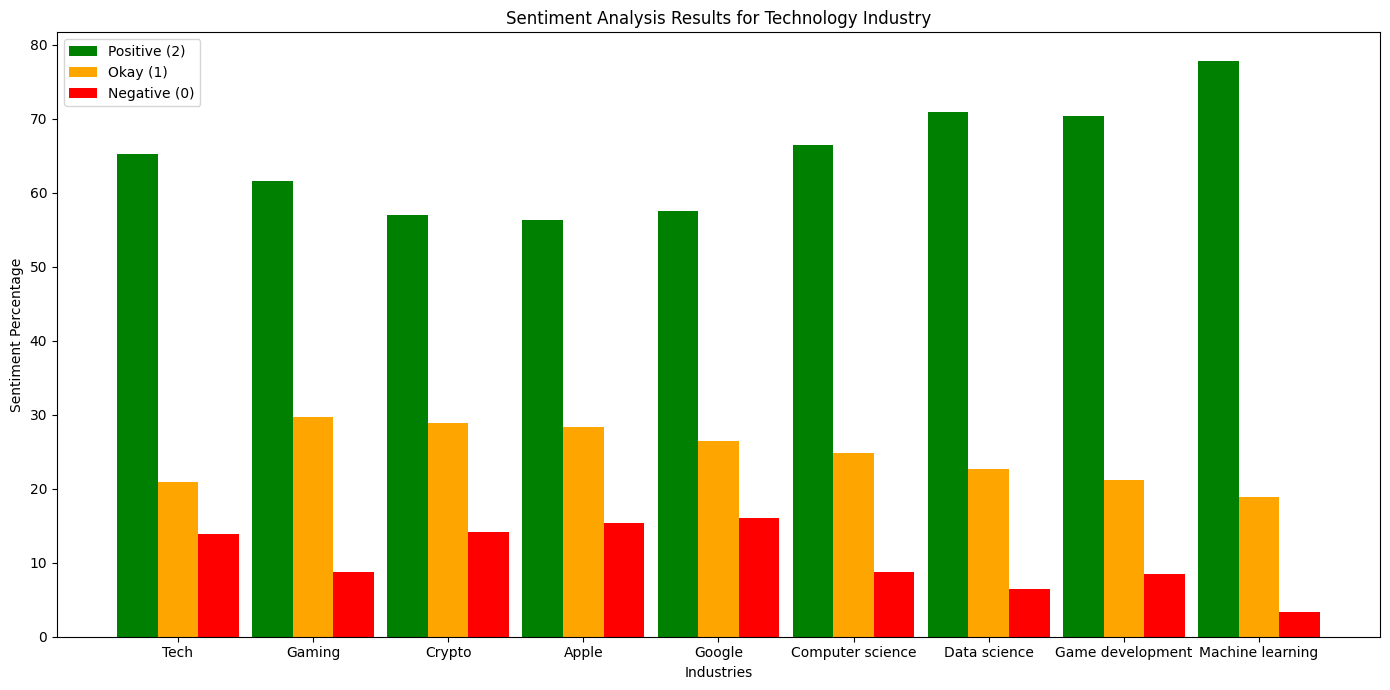

In [32]:
bar_width = 0.3
index = range(len(keywords_in_Technology))
plt.figure(figsize=(14, 7))

plt.bar(index, positive_percentages, bar_width, label='Positive (2)', color='green')
plt.bar([i + bar_width for i in index], okay_percentages, bar_width, label='Okay (1)', color='orange')
plt.bar([i + 2 * bar_width for i in index], negative_percentages, bar_width, label='Negative (0)', color='red')

plt.xlabel('Industries')
plt.ylabel('Sentiment Percentage')
plt.title('Sentiment Analysis Results for Technology Industry')
plt.xticks([i + bar_width for i in index], [keyword.capitalize() for keyword in keywords_in_Technology])
plt.legend()

plt.tight_layout()
plt.show()

In [33]:
positive_likes_percentages=[]
negative_likes_percentages=[]
okay_likes_percentages=[]
for keyword, dataframe in zip(keywords_in_Technology, Technology_dataframes):
    pos,okay,neg = analyze_sentiment_likes(keyword, dataframe)
    positive_likes_percentages.append(pos)
    okay_likes_percentages.append(okay)
    negative_likes_percentages.append(neg)
   


SENTIMENT ANALYSIS based on comments' LIKES

tech Positive (2) likes : 53.18% of total likes
tech Okay (1) likes : 25.11% of total likes
tech Negative (0) likes : 21.71% of total likes




SENTIMENT ANALYSIS based on comments' LIKES

gaming Positive (2) likes : 66.09% of total likes
gaming Okay (1) likes : 25.47% of total likes
gaming Negative (0) likes : 8.44% of total likes




SENTIMENT ANALYSIS based on comments' LIKES

crypto Positive (2) likes : 60.97% of total likes
crypto Okay (1) likes : 12.57% of total likes
crypto Negative (0) likes : 26.47% of total likes




SENTIMENT ANALYSIS based on comments' LIKES

apple Positive (2) likes : 69.09% of total likes
apple Okay (1) likes : 23.63% of total likes
apple Negative (0) likes : 7.29% of total likes




SENTIMENT ANALYSIS based on comments' LIKES

google Positive (2) likes : 55.83% of total likes
google Okay (1) likes : 29.63% of total likes
google Negative (0) likes : 14.54% of total likes




SENTIMENT ANALYSIS based on comment

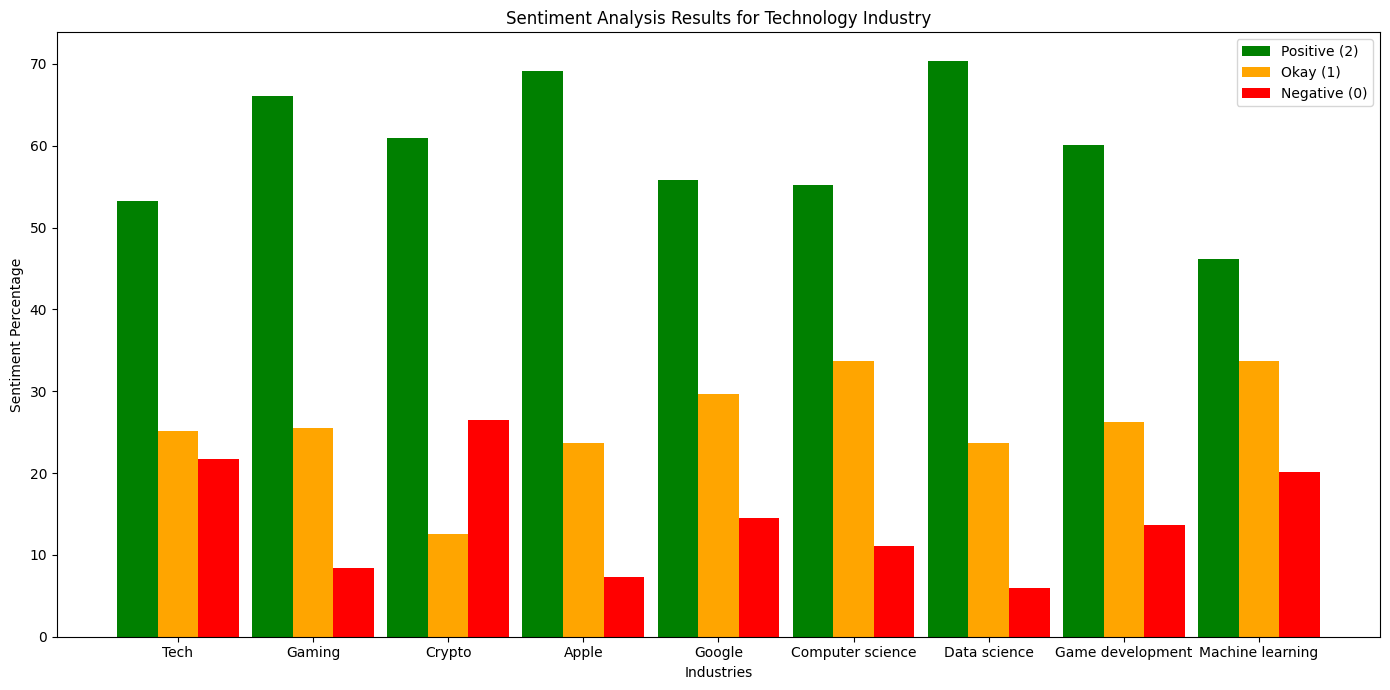

In [34]:
bar_width = 0.3
index = range(len(keywords_in_Technology))
plt.figure(figsize=(14, 7))

plt.bar(index, positive_likes_percentages, bar_width, label='Positive (2)', color='green')
plt.bar([i + bar_width for i in index], okay_likes_percentages, bar_width, label='Okay (1)', color='orange')
plt.bar([i + 2 * bar_width for i in index], negative_likes_percentages, bar_width, label='Negative (0)', color='red')

plt.xlabel('Industries')
plt.ylabel('Sentiment Percentage')
plt.title('Sentiment Analysis Results for Technology Industry')
plt.xticks([i + bar_width for i in index], [keyword.capitalize() for keyword in keywords_in_Technology])
plt.legend()

plt.tight_layout()
plt.show()

In [35]:

positive_percentages = []
okay_percentages = []
negative_percentages = []

for keyword, dataframe in zip(keywords_in_Technology, Technology_dataframes):
    pos, okay, neg = weighted_sentiment_analysis(keyword, dataframe)
    positive_percentages.append(pos)
    okay_percentages.append(okay)
    negative_percentages.append(neg)


SENTIMENT ANALYSIS based on just COMMENTS

tech Positive (2) response : 65.18%
tech Okay (1) response : 20.92%
tech Negative (0) response: 13.90%

SENTIMENT ANALYSIS based on comments' LIKES

tech Positive (2) likes : 53.18% of total likes
tech Okay (1) likes : 25.11% of total likes
tech Negative (0) likes : 21.71% of total likes




WEIGHTED SENTIMENT ANALYSIS based on COMMENTS and their LIKES

tech Positive (2) response : 51.13%
tech Okay (1) response : 19.89%
tech Negative (0) response: 28.98%

SENTIMENT ANALYSIS based on just COMMENTS

gaming Positive (2) response : 61.55%
gaming Okay (1) response : 29.72%
gaming Negative (0) response: 8.73%

SENTIMENT ANALYSIS based on comments' LIKES

gaming Positive (2) likes : 66.09% of total likes
gaming Okay (1) likes : 25.47% of total likes
gaming Negative (0) likes : 8.44% of total likes




WEIGHTED SENTIMENT ANALYSIS based on COMMENTS and their LIKES

gaming Positive (2) response : 49.54%
gaming Okay (1) response : 21.42%
gaming Negative

#### - Comments = Sentiment based on just Comments
#### - Likes = Sentiment based on comments' Likes
#### - Weighted = Sentiment based on both Comments and their Likes

| Technology Industry's Sectors | Positive (2) - Comments | Okay (1) - Comments | Negative (0) - Comments | Positive (2) - Likes | Okay (1) - Likes | Negative (0) - Likes | Weighted Positive (2) | Weighted Okay (1) | Weighted Negative (0) |
|-------------------------------|-------------------------|---------------------|-------------------------|----------------------|------------------|----------------------|-----------------------|-------------------|------------------------|
| Tech                          | 65.18%                  | 20.92%              | 13.90%                  | 53.18%               | 25.11%           | 21.71%               | 51.13%                | 19.89%            | 28.98%                 |
| Gaming                        | 61.55%                  | 29.72%              | 8.73%                   | 66.09%               | 25.47%           | 8.44%                | 49.54%                | 21.42%            | 29.04%                 |
| Crypto                        | 57.05%                  | 28.85%              | 14.10%                  | 60.97%               | 12.57%           | 26.47%               | 50.33%                | 17.66%            | 32.01%                 |
| Apple                         | 56.34%                  | 28.29%              | 15.37%                  | 69.09%               | 23.63%           | 7.29%                | 47.91%                | 19.83%            | 32.26%                 |
| Google                        | 57.57%                  | 26.45%              | 15.98%                  | 55.83%               | 29.63%           | 14.54%               | 47.00%                | 23.24%            | 29.76%                 |
| Computer Science              | 66.49%                  | 24.80%              | 8.71%                   | 55.23%               | 33.74%           | 11.03%               | 49.84%                | 23.97%            | 26.18%                 |
| Data Science                  | 70.84%                  | 22.71%              | 6.45%                   | 70.34%               | 23.66%           | 6.00%                | 53.41%                | 17.54%            | 29.05%                 |
| Game Development              | 70.38%                  | 21.22%              | 8.41%                   | 60.09%               | 26.22%           | 13.69%               | 52.95%                | 19.25%            | 27.80%                 |
| Machine Learning              | 77.78%                  | 18.91%              | 3.31%                   | 46.14%               | 33.73%           | 20.13%               | 54.83%                | 23.29%            | 21.88%                 |


# Recommendation:

After analyzing the sentiment data, it's clear that certain sectors stand out as prime investment opportunities. Here's a breakdown of our recommendations:

- **Machine Learning and Data Science:** These sectors exhibit the most promising sentiment scores, indicating strong community support and enthusiasm. With high positive sentiments and robust weighted responses, they offer substantial potential for growth and innovation.

- **Game Development and Computer Science:** While slightly behind Machine Learning and Data Science, these sectors still present favorable sentiment metrics. Investors should consider allocating resources to capitalize on their positive trends and emerging opportunities.

- **Apple and Google:** Despite mixed sentiment scores, Apple and Google remain significant players in the market. Their established positions and ongoing innovation efforts make them worthy contenders for investment, albeit with a need for careful evaluation and targeted strategies.

- **Crypto and General Tech Sectors:** Approach these sectors cautiously, as they exhibit a wider range of sentiment scores. While there are opportunities for growth, investors should focus on specific sub-sectors with higher positive sentiment and potential for sustainable development.

In summary, investors should prioritize Machine Learning and Data Science for their strong sentiment indicators, while also considering Game Development and Computer Science. Apple and Google remain solid options, but thorough evaluation is essential. Exercise caution with Crypto and the broader Tech sectors, focusing on segments with positive sentiment and promising growth prospects.


# 2) **Sentiment Analysis** on the **Computer Industry**

In [36]:
keywords_in_computer = []
for index, row in Computer.iterrows():
    if row['Keyword'] in keywords_in_computer:
        pass
    else:
        keywords_in_computer.append(row['Keyword'])

In [37]:
keywords_in_computer

['tech', 'apple', 'google', 'data science', 'machine learning']

In [38]:
tech_computer = Computer[Computer['Keyword'] == 'tech']
apple_computer = Computer[Computer['Keyword'] == 'apple']
google_computer = Computer[Computer['Keyword'] == 'google']
ds_compuer = Computer[Computer['Keyword'] == 'data science']
ml_computer = Computer[Computer['Keyword'] == 'machine learning']

computer_dataframes = [tech_Technology, apple_Technology, google_Technology,  ds_Technology,  ml_Technology]


In [39]:

positive_percentages = []
okay_percentages = []
negative_percentages = []

for keyword, dataframe in zip(keywords_in_computer, computer_dataframes):
    pos, okay, neg = weighted_sentiment_analysis(keyword, dataframe)
    positive_percentages.append(pos)
    okay_percentages.append(okay)
    negative_percentages.append(neg)


SENTIMENT ANALYSIS based on just COMMENTS

tech Positive (2) response : 65.18%
tech Okay (1) response : 20.92%
tech Negative (0) response: 13.90%

SENTIMENT ANALYSIS based on comments' LIKES

tech Positive (2) likes : 53.18% of total likes
tech Okay (1) likes : 25.11% of total likes
tech Negative (0) likes : 21.71% of total likes




WEIGHTED SENTIMENT ANALYSIS based on COMMENTS and their LIKES

tech Positive (2) response : 51.13%
tech Okay (1) response : 19.89%
tech Negative (0) response: 28.98%

SENTIMENT ANALYSIS based on just COMMENTS

apple Positive (2) response : 56.34%
apple Okay (1) response : 28.29%
apple Negative (0) response: 15.37%

SENTIMENT ANALYSIS based on comments' LIKES

apple Positive (2) likes : 69.09% of total likes
apple Okay (1) likes : 23.63% of total likes
apple Negative (0) likes : 7.29% of total likes




WEIGHTED SENTIMENT ANALYSIS based on COMMENTS and their LIKES

apple Positive (2) response : 47.91%
apple Okay (1) response : 19.83%
apple Negative (0) res

| Computer Industry's Sector | Positive (2) - Comments | Okay (1) - Comments | Negative (0) - Comments | Positive (2) - Likes | Okay (1) - Likes | Negative (0) - Likes | Weighted Positive (2) | Weighted Okay (1) | Weighted Negative (0) |
|----------------------------|-------------------------|---------------------|-------------------------|-----------------------|-------------------|------------------------|------------------------|--------------------|------------------------|
| Tech                       | 65.18%                  | 20.92%              | 13.90%                  | 53.18%                | 25.11%            | 21.71%                 | 51.13%                 | 19.89%             | 28.98%                 |
| Apple                      | 56.34%                  | 28.29%              | 15.37%                  | 69.09%                | 23.63%            | 7.29%                  | 47.91%                 | 19.83%             | 32.26%                 |
| Google                     | 57.57%                  | 26.45%              | 15.98%                  | 55.83%                | 29.63%            | 14.54%                 | 47.00%                 | 23.24%             | 29.76%                 |
| Data Science               | 70.84%                  | 22.71%              | 6.45%                   | 70.34%                | 23.66%            | 6.00%                  | 53.41%                 | 17.54%             | 29.05%                 |
| Machine Learning           | 77.78%                  | 18.91%              | 3.31%                   | 46.14%                | 33.73%            | 20.13%                 | 54.83%                 | 23.29%             | 21.88%                 |


# Recommendation:

After analyzing the sentiment data for the computer industry, it's evident that certain sectors present attractive investment opportunities. Here's a detailed recommendation:

- **Machine Learning and Data Science:** These sectors demonstrate the highest positive sentiments in both comments and likes. With a strong community backing and significant potential for growth and innovation, investments in Machine Learning and Data Science are highly recommended.

- **Apple and Google:** Despite mixed sentiment scores, Apple and Google maintain their significance within the industry. Their established market positions and ongoing innovation efforts make them worthy candidates for investment. However, careful evaluation and targeted strategies are essential to mitigate risks associated with their fluctuating sentiment trends.

- **Crypto:** While exhibiting a wide range of sentiment scores, the crypto sector presents opportunities for growth. Investors should proceed cautiously and focus on specific sub-sectors with higher positive sentiment and sustainable growth prospects.

In summary, investors in the computer industry should prioritize investments in Machine Learning and Data Science. While Apple, Google, and Crypto sectors remain viable options, thorough evaluation is necessary. Exercise caution and focus on segments with positive sentiment and promising growth prospects.


In [40]:
industries = {
    "Computer": Computer,
    "Entertainment": videos_stats[videos_stats['Industry'].str.contains('Entertainment')],
    "Art": videos_stats[videos_stats['Industry'].str.contains('Art')],
    "Media": videos_stats[videos_stats['Industry'].str.contains('Media')],
    "Television": videos_stats[videos_stats['Industry'].str.contains('Television')],
    "Education": videos_stats[videos_stats['Industry'].str.contains('Education')],
    "Marketing": videos_stats[videos_stats['Industry'].str.contains('Marketing')],
    "Advertising": videos_stats[videos_stats['Industry'].str.contains('Advertising')],
    "Investment": videos_stats[videos_stats['Industry'].str.contains('Investment')],
    "Business": videos_stats[videos_stats['Industry'].str.contains('Business')],
    "Research": videos_stats[videos_stats['Industry'].str.contains('Research')],
    "Design": videos_stats[videos_stats['Industry'].str.contains('Design')],
    "Internet": videos_stats[videos_stats['Industry'].str.contains('Internet')],
    "Music": videos_stats[videos_stats['Industry'].str.contains('Music')],
    "Health": videos_stats[videos_stats['Industry'].str.contains('Health')],
    "Sound_Recording_And_Reproduction": videos_stats[videos_stats['Industry'].str.contains('Sound Recording And Reproduction')],
    "Artificial_Intelligence": videos_stats[videos_stats['Industry'].str.contains('Artificial Intelligence')],
    "Software": videos_stats[videos_stats['Industry'].str.contains('Software')],
    "Food": videos_stats[videos_stats['Industry'].str.contains('Food')],
    "Video_Production": videos_stats[videos_stats['Industry'].str.contains('Video Production')]
}


# AUTOMATING REST OF THE PROCESS FOR EFFICIENCY

In [41]:
# Initialize lists to store results
keywords_dict = {}
positive_percentages = {}
okay_percentages = {}
negative_percentages = {}

# Extract keywords and perform sentiment analysis for each industry
for industry, dataframe in industries.items():
    keywords = []
    print('')
    print('')
    print(industry)
    for index, row in dataframe.iterrows():
        if row['Keyword'] not in keywords:
            keywords.append(row['Keyword'])
    
    keywords_dict[industry] = keywords
    
    
    positive_percentages[industry] = []
    okay_percentages[industry] = []
    negative_percentages[industry] = []

    for keyword in keywords:
        # Assuming each keyword has a corresponding dataframe for sentiment analysis
        keyword_data = dataframe[dataframe['Keyword'] == keyword]

        pos, okay, neg = weighted_sentiment_analysis(keyword, keyword_data)
        positive_percentages[industry].append(pos)
        okay_percentages[industry].append(okay)
        negative_percentages[industry].append(neg)



Computer

SENTIMENT ANALYSIS based on just COMMENTS

tech Positive (2) response : 65.18%
tech Okay (1) response : 20.92%
tech Negative (0) response: 13.90%

SENTIMENT ANALYSIS based on comments' LIKES

tech Positive (2) likes : 53.18% of total likes
tech Okay (1) likes : 25.11% of total likes
tech Negative (0) likes : 21.71% of total likes




WEIGHTED SENTIMENT ANALYSIS based on COMMENTS and their LIKES

tech Positive (2) response : 51.13%
tech Okay (1) response : 19.89%
tech Negative (0) response: 28.98%

SENTIMENT ANALYSIS based on just COMMENTS

apple Positive (2) response : 56.34%
apple Okay (1) response : 28.29%
apple Negative (0) response: 15.37%

SENTIMENT ANALYSIS based on comments' LIKES

apple Positive (2) likes : 69.09% of total likes
apple Okay (1) likes : 23.63% of total likes
apple Negative (0) likes : 7.29% of total likes




WEIGHTED SENTIMENT ANALYSIS based on COMMENTS and their LIKES

apple Positive (2) response : 47.91%
apple Okay (1) response : 19.83%
apple Negat

# 3) Computer



| Computer Industry's Sector | Positive (2) - Comments | Okay (1) - Comments | Negative (0) - Comments | Positive (2) - Likes | Okay (1) - Likes | Negative (0) - Likes | Weighted Positive (2) | Weighted Okay (1) | Weighted Negative (0) |
|----------------------------|-------------------------|---------------------|-------------------------|-----------------------|-------------------|------------------------|------------------------|--------------------|------------------------|
| Tech                       | 65.18%                  | 20.92%              | 13.90%                  | 53.18%                | 25.11%            | 21.71%                 | 51.13%                 | 19.89%             | 28.98%                 |
| Apple                      | 56.34%                  | 28.29%              | 15.37%                  | 69.09%                | 23.63%            | 7.29%                  | 47.91%                 | 19.83%             | 32.26%                 |
| Google                     | 57.57%                  | 26.45%              | 15.98%                  | 55.83%                | 29.63%            | 14.54%                 | 47.00%                 | 23.24%             | 29.76%                 |
| Data Science               | 70.84%                  | 22.71%              | 6.45%                   | 70.34%                | 23.66%            | 6.00%                  | 53.41%                 | 17.54%             | 29.05%                 |
| Machine Learning           | 77.78%                  | 18.91%              | 3.31%                   | 46.14%                | 33.73%            | 20.13%                 | 54.83%                 | 23.29%             | 21.88%                 |


## Conclusion

The sentiment analysis for the computer industry reveals key insights for potential investments:

- **Tech:** Mixed outlook with 65.18% positive comments but 28.98% negative weighted sentiment. Approach with caution.
- **Apple:** Strong positive engagement (69.09% likes), but significant negative weighted sentiment (32.26%). Evaluate risks carefully.
- **Google:** High positive sentiment, yet 29.76% negative weighted response. Invest strategically.
- **Data Science:** Highly attractive with 70.84% positive comments and 53.41% positive weighted sentiment. Excellent investment opportunity.
- **Machine Learning:** Strongest positive response with 77.78% positive comments and 54.83% positive weighted sentiment. Highly recommended for investment.

In summary, prioritize Data Science and Machine Learning.



---

# 4) Entertainment

| Entertainment        | Positive (2) - Comments | Okay (1) - Comments | Negative (0) - Comments | Positive (2) - Likes | Okay (1) - Likes | Negative (0) - Likes | Weighted Positive (2) | Weighted Okay (1) | Weighted Negative (0) |
|----------------------|-------------------------|---------------------|-------------------------|-----------------------|-------------------|------------------------|------------------------|--------------------|------------------------|
| news                 | 39.55%                  | 34.93%              | 25.52%                  | 68.33%                | 21.51%            | 10.16%                 | 41.79%                 | 21.86%             | 36.35%                 |
| gaming               | 61.55%                  | 29.72%              | 8.73%                   | 66.09%                | 25.47%            | 8.44%                  | 49.54%                 | 21.42%             | 29.04%                 |
| music                | 72.51%                  | 22.03%              | 5.46%                   | 52.95%                | 30.99%            | 16.06%                 | 52.96%                 | 22.38%             | 24.66%                 |
| cubes                | 55.88%                  | 31.18%              | 12.94%                  | 39.67%                | 31.91%            | 28.42%                 | 45.23%                 | 29.86%             | 24.90%                 |
| chess                | 59.86%                  | 28.49%              | 11.64%                  | 48.81%                | 31.98%            | 19.21%                 | 47.33%                 | 26.34%             | 26.33%                 |
| trolling             | 48.00%                  | 24.60%              | 27.40%                  | 36.37%                | 29.51%            | 34.11%                 | 41.72%                 | 26.75%             | 31.53%                 |
| asmr                 | 72.41%                  | 21.89%              | 5.70%                   | 66.08%                | 28.88%            | 5.04%                  | 53.05%                 | 19.45%             | 27.50%                 |
| food                 | 74.74%                  | 15.66%              | 9.60%                   | 57.62%                | 22.67%            | 19.70%                 | 55.63%                 | 16.11%             | 28.26%                 |
| mukbang              | 68.30%                  | 23.42%              | 8.27%                   | 67.98%                | 18.75%            | 13.27%                 | 53.51%                 | 16.56%             | 29.94%                 |
| reaction             | 64.07%                  | 26.21%              | 9.72%                   | 49.88%                | 46.91%            | 3.22%                  | 46.19%                 | 29.64%             | 24.16%                 |
| animals              | 63.30%                  | 25.08%              | 11.62%                  | 59.75%                | 25.45%            | 14.80%                 | 50.23%                 | 20.63%             | 29.14%                 |
| minecraft            | 54.59%                  | 39.16%              | 6.25%                   | 64.52%                | 28.46%            | 7.02%                  | 46.26%                 | 26.26%             | 27.48%                 |
| mrbeast              | 73.20%                  | 18.80%              | 8.00%                   | 54.67%                | 17.53%            | 27.81%                 | 56.36%                 | 16.01%             | 27.62%                 |
| nintendo             | 64.48%                  | 24.90%              | 10.62%                  | 55.46%                | 37.25%            | 7.30%                  | 48.33%                 | 25.04%             | 26.63%                 |
| xbox                 | 58.92%                  | 29.26%              | 11.82%                  | 41.81%                | 44.13%            | 14.06%                 | 44.23%                 | 32.22%             | 23.55%                 |
| marvel               | 55.89%                  | 36.59%              | 7.52%                   | 56.50%                | 28.94%            | 14.56%                 | 46.46%                 | 27.08%             | 26.46%                 |
| movies               | 60.90%                  | 28.69%              | 10.41%                  | 63.03%                | 33.49%            | 3.49%                  | 47.75%                 | 23.96%             | 28.29%                 |


## Conclusion

The sentiment analysis for the entertainment industry shows varied engagement levels:

- **News:** Mixed with 41.79% positive and 36.35% negative sentiment. Proceed cautiously.
- **Gaming:** Positive at 61.55%, but 29.04% negative sentiment. Consider risks.
- **Music:** Strongly positive (72.51%), yet 24.66% negative sentiment.
- **Cubes:** Balanced with 55.88% positive and 24.90% negative sentiment.
- **Chess:** Positive at 59.86%, with 26.33% negative sentiment.
- **Trolling:** Mixed responses with 48.00% positive and 31.53% negative sentiment.
- **ASMR:** High positivity (72.41%), but 27.50% negative sentiment.
- **Food:** Very positive (74.74%), though 28.26% negative sentiment.
- **Mukbang:** Strongly positive (68.30%), but 29.94% negative sentiment.
- **Reaction:** High positivity (64.07%) with 24.16% negative sentiment.
- **Animals:** Positive (63.30%), but 29.14% negative sentiment.
- **Minecraft:** Positive (54.59%) with 27.48% negative sentiment.
- **MrBeast:** Highly positive (73.20%) but 27.62% negative sentiment.
- **Nintendo:** Positive (64.48%), with 26.63% negative sentiment.
- **Xbox:** Positive (58.92%) with 23.55% negative sentiment.
- **Marvel:** Positive (55.89%) with 26.46% negative sentiment.
- **Movies:** Positive (60.90%) with 28.29% negative sentiment.

Overall, focus on categories with high positive engagement but monitor the negative sentiments for a balanced approach.


---

# 5) Art 

| Art Sector    | Positive (2) - Comments | Okay (1) - Comments | Negative (0) - Comments | Positive (2) - Likes | Okay (1) - Likes | Negative (0) - Likes | Weighted Positive (2) | Weighted Okay (1) | Weighted Negative (0) |
|---------------|-------------------------|---------------------|-------------------------|-----------------------|-------------------|------------------------|------------------------|--------------------|------------------------|
| Literature    | 68.91%                  | 20.65%              | 10.44%                  | 46.26%                | 36.80%            | 16.94%                 | 50.22%                 | 25.05%             | 24.73%                 |
| Movies        | 60.90%                  | 28.69%              | 10.41%                  | 63.03%                | 33.49%            | 3.49%                  | 47.75%                 | 23.96%             | 28.29%                 |


## Conclusion

Insights from sentiment analysis in the Art domain:

- **Literature**:
  - Comments skew positively (68.91%), but likes reveal a more mixed sentiment.
  - Weighted sentiment balances positivity (50.22%) with notable okay (25.05%) and negative (24.73%) responses.
  
- **Movies**:
  - Comments express positivity (60.90%), but weighted sentiment reflects a more nuanced picture (47.75% positive, 23.96% okay, 28.29% negative).
  
These findings underscore the need for deeper analysis beyond surface sentiments to make informed decisions.


# 6) Media

| Media | Positive (2) - Comments | Okay (1) - Comments | Negative (0) - Comments | Positive (2) - Likes | Okay (1) - Likes | Negative (0) - Likes | Weighted Positive (2) | Weighted Okay (1) | Weighted Negative (0) |
|-------|-------------------------|---------------------|-------------------------|-----------------------|-------------------|------------------------|------------------------|--------------------|------------------------|
| News  | 39.55%                  | 34.93%              | 25.52%                  | 68.33%                | 21.51%            | 10.16%                 | 41.79%                 | 21.86%             | 36.35%                 |
| Interview | 69.08%               | 21.09%              | 9.83%                   | 63.92%                | 23.63%            | 12.45%                 | 52.89%                 | 17.78%             | 29.33%                 |
| Reaction | 64.07%                 | 26.21%              | 9.72%                   | 49.88%                | 46.91%            | 3.22%                  | 46.19%                 | 29.64%             | 24.16%                 |
| CNN   | 14.89%                  | 29.78%              | 55.33%                  | 8.80%                 | 24.52%            | 66.68%                 | 16.67%                 | 38.21%             | 45.12%                 |


## Conclusion

The sentiment analysis across various media platforms provides valuable insights:

- **News:** The sentiment based on comments is mixed, with a slightly more positive outlook indicated by the weighted sentiment analysis. Engagement through likes also leans towards positivity.
- **Interview:** Interviews generally receive a positive response in comments and likes, although the weighted sentiment analysis suggests a slightly lower positive sentiment.
- **Reaction:** While comments on reactions are predominantly positive, the weighted sentiment analysis shows a more balanced outlook. Engagement through likes also reflects a mix of sentiments.
- **CNN:** Comments on CNN's content tend to be negative, but the weighted sentiment analysis presents a more balanced perspective. However, engagement through likes indicates a predominantly negative sentiment.

In summary, considering both raw comments and weighted sentiment analysis alongside engagement metrics is crucial for a comprehensive understanding of audience sentiments across media platforms.


# 7) Televison

| Television Platform | Positive (2) - Comments | Okay (1) - Comments | Negative (0) - Comments | Positive (2) - Likes | Okay (1) - Likes | Negative (0) - Likes | Weighted Positive (2) | Weighted Okay (1) | Weighted Negative (0) |
|---------------------|-------------------------|---------------------|-------------------------|-----------------------|-------------------|------------------------|------------------------|--------------------|------------------------|
| News                | 39.55%                  | 34.93%              | 25.52%                  | 68.33%                | 21.51%            | 10.16%                 | 41.79%                 | 21.86%             | 36.35%                 |
| CNN                 | 14.89%                  | 29.78%              | 55.33%                  | 8.80%                 | 24.52%            | 66.68%                 | 16.67%                 | 38.21%             | 45.12%                 |

## Conclusion

The sentiment analysis for television platforms highlights contrasting patterns:

- **News:** While comments suggest a balanced sentiment, engagement through likes skews heavily towards positivity. The weighted sentiment analysis indicates a slightly more positive outlook.
- **CNN:** Comments predominantly express negative sentiments, which is further emphasized by engagement metrics. The weighted sentiment analysis confirms a higher proportion of negative sentiment.

Overall, understanding both raw comments and engagement metrics provides a comprehensive view of audience sentiment on television platforms.



# 8) Education

| Education Category | Positive (2) - Comments | Okay (1) - Comments | Negative (0) - Comments | Positive (2) - Likes | Okay (1) - Likes | Negative (0) - Likes | Weighted Positive (2) | Weighted Okay (1) | Weighted Negative (0) |
|--------------------|-------------------------|---------------------|-------------------------|-----------------------|-------------------|------------------------|------------------------|--------------------|------------------------|
| How-To             | 66.67%                  | 22.09%              | 11.25%                  | 38.30%                | 30.70%            | 31.00%                 | 50.64%                 | 25.46%             | 23.90%                 |
| Tutorial           | 75.49%                  | 19.80%              | 4.71%                   | 57.97%                | 33.01%            | 9.02%                  | 53.61%                 | 21.21%             | 25.18%                 |
| Chess              | 59.86%                  | 28.49%              | 11.64%                  | 48.81%                | 31.98%            | 19.21%                 | 47.33%                 | 26.34%             | 26.33%                 |
| History            | 51.28%                  | 27.86%              | 20.86%                  | 31.62%                | 17.73%            | 50.66%                 | 45.81%                 | 25.19%             | 29.00%                 |
| Literature         | 68.91%                  | 20.65%              | 10.44%                  | 46.26%                | 36.80%            | 16.94%                 | 50.22%                 | 25.05%             | 24.73%                 |
| Animals            | 63.30%                  | 25.08%              | 11.62%                  | 59.75%                | 25.45%            | 14.80%                 | 50.23%                 | 20.63%             | 29.14%                 |
| Education          | 50.91%                  | 23.18%              | 25.91%                  | 43.28%                | 14.16%            | 42.56%                 | 46.92%                 | 18.61%             | 34.47%                 |
| SAT                | 57.76%                  | 25.10%              | 17.14%                  | 31.51%                | 43.97%            | 24.52%                 | 43.12%                 | 33.37%             | 23.50%                 |
| Math/Chemistry     | 77.44%                  | 15.79%              | 6.77%                   | 30.80%                | 58.86%            | 10.34%                 | 49.10%                 | 33.86%             | 17.04%                 |
| Biology            | 63.40%                  | 24.04%              | 12.55%                  | 43.14%                | 43.73%            | 13.13%                 | 46.32%                 | 29.46%             | 24.21%                 |
| Physics            | 64.40%                  | 26.60%              | 9.00%                   | 51.45%                | 40.27%            | 8.27%                  | 47.64%                 | 27.50%             | 24.86%                 |
| Computer Science   | 66.49%                  | 24.80%              | 8.71%                   | 55.23%                | 33.74%            | 11.03%                 | 49.84%                 | 23.97%             | 26.18%                 |
| Game Development   | 70.38%                  | 21.22%              | 8.41%                   | 60.09%                | 26.22%            | 13.69%                 | 52.95%                 | 19.25%             | 27.80%                 |

## Conclusion

The sentiment analysis for education categories presents varied outlooks:

- **How-To and Tutorials:** Both categories exhibit high positive sentiments, especially in tutorial content. However, engagement metrics reveal a significant proportion of dislikes.
- **Chess, History, and Literature:** These categories show moderate positive sentiments with relatively balanced engagement metrics.
- **Animals:** While positive sentiment is strong, engagement metrics indicate a more balanced response, with a notable negative sentiment.
- **Education, SAT, Math/Chemistry, Biology, Physics, Computer Science, and Game Development:** These categories demonstrate mixed sentiments, with varying degrees of positive and negative responses. Engagement metrics provide additional insights into audience preferences and sentiment alignment.

Overall, understanding both raw comments and engagement metrics provides a comprehensive view of audience sentiment in education-related content.


# 9) Marketing

| Marketing Category | Positive (2) - Comments | Okay (1) - Comments | Negative (0) - Comments | Positive (2) - Likes | Okay (1) - Likes | Negative (0) - Likes | Weighted Positive (2) | Weighted Okay (1) | Weighted Negative (0) |
|--------------------|-------------------------|---------------------|-------------------------|-----------------------|-------------------|------------------------|------------------------|--------------------|------------------------|
| Business           | 61.71%                  | 24.30%              | 13.99%                  | 68.60%                | 22.41%            | 8.99%                  | 50.19%                 | 17.99%             | 31.81%                 |
| Apple              | 56.34%                  | 28.29%              | 15.37%                  | 69.09%                | 23.63%            | 7.29%                  | 47.91%                 | 19.83%             | 32.26%                 |
| Google             | 57.57%                  | 26.45%              | 15.98%                  | 55.83%                | 29.63%            | 14.54%                 | 47.00%                 | 23.24%             | 29.76%                 |
| Interview          | 69.08%                  | 21.09%              | 9.83%                   | 63.92%                | 23.63%            | 12.45%                 | 52.89%                 | 17.78%             | 29.33%                 |

## Conclusion

The sentiment analysis for marketing categories reveals valuable insights:

- **Business:** Strong positive sentiment in comments and high likes percentage but notable negative weighted sentiment. Further analysis required.
- **Apple:** Despite high positive comments and likes, negative weighted sentiment suggests some areas of concern.
- **Google:** Positive sentiment dominates, but negative weighted sentiment indicates room for improvement.
- **Interview:** Generally positive engagement, with a balanced sentiment distribution. Consider additional metrics for deeper analysis.


# 10)Advertising

| Advertising Category | Positive (2) - Comments | Okay (1) - Comments | Negative (0) - Comments | Positive (2) - Likes | Okay (1) - Likes | Negative (0) - Likes | Weighted Positive (2) | Weighted Okay (1) | Weighted Negative (0) |
|----------------------|-------------------------|---------------------|-------------------------|-----------------------|-------------------|------------------------|------------------------|--------------------|------------------------|
| Business             | 61.71%                  | 24.30%              | 13.99%                  | 68.60%                | 22.41%            | 8.99%                  | 50.19%                 | 17.99%             | 31.81%                 |
| Apple                | 56.34%                  | 28.29%              | 15.37%                  | 69.09%                | 23.63%            | 7.29%                  | 47.91%                 | 19.83%             | 32.26%                 |
| Google               | 57.57%                  | 26.45%              | 15.98%                  | 55.83%                | 29.63%            | 14.54%                 | 47.00%                 | 23.24%             | 29.76%                 |
| Interview            | 69.08%                  | 21.09%              | 9.83%                   | 63.92%                | 23.63%            | 12.45%                 | 52.89%                 | 17.78%             | 29.33%                 |

## Conclusion

For the advertising category, the sentiment analysis indicates:

- **Business:** Strong positive sentiment in comments and high likes percentage, but negative weighted sentiment needs attention for improvement.
- **Apple:** While receiving considerable positive feedback and likes, negative weighted sentiment suggests areas for enhancement.
- **Google:** Positive sentiment is dominant, but negative weighted sentiment indicates areas for refinement.
- **Interview:** Overall positive engagement, with a balanced sentiment distribution. Further analysis could provide deeper insights.


# 11) Investment

| Investment Category | Positive (2) - Comments | Okay (1) - Comments | Negative (0) - Comments | Positive (2) - Likes | Okay (1) - Likes | Negative (0) - Likes | Weighted Positive (2) | Weighted Okay (1) | Weighted Negative (0) |
|---------------------|-------------------------|---------------------|-------------------------|-----------------------|-------------------|------------------------|------------------------|--------------------|------------------------|
| Business            | 61.71%                  | 24.30%              | 13.99%                  | 68.60%                | 22.41%            | 8.99%                  | 50.19%                 | 17.99%             | 31.81%                 |
| Finance             | 45.79%                  | 30.53%              | 23.68%                  | 47.24%                | 28.43%            | 24.33%                 | 41.74%                 | 26.45%             | 31.82%                 |
| Crypto              | 57.05%                  | 28.85%              | 14.10%                  | 60.97%                | 12.57%            | 26.47%                 | 50.33%                 | 17.66%             | 32.01%                 |

## Conclusion

For the investment category, the sentiment analysis highlights:

- **Business:** Positive sentiment dominates, but attention is needed to improve negative weighted sentiment.
- **Finance:** While there is a moderate level of positive sentiment, the weighted analysis suggests room for improvement in addressing negative sentiment.
- **Crypto:** Positive sentiment is strong, but negative weighted sentiment indicates areas for refinement and balance.


# 12) Business

| Business Category | Positive (2) - Comments | Okay (1) - Comments | Negative (0) - Comments | Positive (2) - Likes | Okay (1) - Likes | Negative (0) - Likes | Weighted Positive (2) | Weighted Okay (1) | Weighted Negative (0) |
|-------------------|-------------------------|---------------------|-------------------------|-----------------------|-------------------|------------------------|------------------------|--------------------|------------------------|
| Business          | 61.71%                  | 24.30%              | 13.99%                  | 68.60%                | 22.41%            | 8.99%                  | 50.19%                 | 17.99%             | 31.81%                 |
| Finance           | 45.79%                  | 30.53%              | 23.68%                  | 47.24%                | 28.43%            | 24.33%                 | 41.74%                 | 26.45%             | 31.82%                 |

## Conclusion

In the realm of business, the sentiment analysis showcases:

- **Business:** Demonstrates a strong positive sentiment in both comments and likes, indicating a favorable reception among the audience.
- **Finance:** While also exhibiting a positive sentiment, the sentiment distribution is more evenly spread between positive, okay, and negative responses compared to business content.
- Weighted sentiment analysis suggests that the balance between positive, okay, and negative responses varies between business and finance content.



# 13) Research

| Research Category | Positive (2) - Comments | Okay (1) - Comments | Negative (0) - Comments | Positive (2) - Likes | Okay (1) - Likes | Negative (0) - Likes | Weighted Positive (2) | Weighted Okay (1) | Weighted Negative (0) |
|------------------|-------------------------|---------------------|-------------------------|-----------------------|-------------------|------------------------|------------------------|--------------------|------------------------|
| History          | 51.28%                  | 27.86%              | 20.86%                  | 31.62%                | 17.73%            | 50.66%                 | 45.81%                 | 25.19%             | 29.00%                 |
| Education        | 50.91%                  | 23.18%              | 25.91%                  | 43.28%                | 14.16%            | 42.56%                 | 46.92%                 | 18.61%             | 34.47%                 |
| Math & Chemistry | 77.44%                  | 15.79%              | 6.77%                   | 30.80%                | 58.86%            | 10.34%                 | 49.10%                 | 33.86%             | 17.04%                 |
| Biology          | 63.40%                  | 24.04%              | 12.55%                  | 43.14%                | 43.73%            | 13.13%                 | 46.32%                 | 29.46%             | 24.21%                 |
| Physics          | 64.40%                  | 26.60%              | 9.00%                   | 51.45%                | 40.27%            | 8.27%                  | 47.64%                 | 27.50%             | 24.86%                 |
| Data Science     | 70.84%                  | 22.71%              | 6.45%                   | 70.34%                | 23.66%            | 6.00%                  | 53.41%                 | 17.54%             | 29.05%                 |
| Machine Learning| 77.78%                  | 18.91%              | 3.31%                   | 46.14%                | 33.73%            | 20.13%                 | 54.83%                 | 23.29%             | 21.88%                 |

## Conclusion

In the realm of research, the sentiment analysis indicates:

- **Data Science** and **Machine Learning** have notably high positive sentiment in both comments and likes, making them prime areas of interest.
- **Math & Chemistry** also exhibit strong positive sentiment but have a notably higher proportion of negative sentiment compared to Data Science and Machine Learning.
- **Physics** and **Biology** show a balanced sentiment distribution across positive, okay, and negative responses, warranting further exploration and refinement.
- **History** and **Education** have positive sentiment but relatively higher proportions of negative sentiment, suggesting areas for improvement and targeted engagement.


# 14) Design


| Design Category | Positive (2) - Comments | Okay (1) - Comments | Negative (0) - Comments | Positive (2) - Likes | Okay (1) - Likes | Negative (0) - Likes | Weighted Positive (2) | Weighted Okay (1) | Weighted Negative (0) |
|-----------------|-------------------------|---------------------|-------------------------|-----------------------|-------------------|------------------------|------------------------|--------------------|------------------------|
| Bed          | 74.15%                  | 19.08%              | 6.77%                   | 63.11%                | 29.46%            | 7.44%                  | 53.69%                 | 18.98%             | 27.33%                 |

## Conclusion

In the design category, the sentiment analysis reveals:

- **Bed:** Displays a predominantly positive sentiment in both comments and likes, with a higher proportion of positive responses compared to okay and negative responses.
- The weighted sentiment analysis indicates a relatively balanced distribution between positive, okay, and negative sentiments, with a slightly higher emphasis on positive sentiments.


# 15) internet

| Internet Category | Positive (2) - Comments | Okay (1) - Comments | Negative (0) - Comments | Positive (2) - Likes | Okay (1) - Likes | Negative (0) - Likes | Weighted Positive (2) | Weighted Okay (1) | Weighted Negative (0) |
|-------------------|-------------------------|---------------------|-------------------------|-----------------------|-------------------|------------------------|------------------------|--------------------|------------------------|
| Internet          | 48.00%                  | 24.60%              | 27.40%                  | 36.37%                | 29.51%            | 34.11%                 | 41.72%                 | 26.75%             | 31.53%                 |

## Conclusion

For the internet category, specifically regarding trolling:

- Sentiment analysis of comments indicates a relatively balanced distribution, with a slightly higher proportion of positive responses compared to negative ones.
- However, analyzing likes reveals a different pattern, with a significant portion of likes attributed to negative sentiments.
- Weighted sentiment analysis considers both comments and likes, showing a moderate level of positive sentiment, albeit with a notable presence of negative sentiment as well.


# 16) Music

| Music Category | Positive (2) - Comments | Okay (1) - Comments | Negative (0) - Comments | Positive (2) - Likes | Okay (1) - Likes | Negative (0) - Likes | Weighted Positive (2) | Weighted Okay (1) | Weighted Negative (0) |
|----------------|-------------------------|---------------------|-------------------------|-----------------------|-------------------|------------------------|------------------------|--------------------|------------------------|
| music          | 72.51%                  | 22.03%              | 5.46%                   | 52.95%                | 30.99%            | 16.06%                 | 52.96%                 | 22.38%             | 24.66%                 |
| lofi           | 76.31%                  | 17.84%              | 5.85%                   | 83.46%                | 14.73%            | 1.81%                  | 56.73%                 | 11.57%             | 31.71%                 |

## Conclusion

Within the realm of music, specifically examining general music and lo-fi:

- For general music, the sentiment analysis based solely on comments shows a predominantly positive sentiment, with a small percentage of okay and negative responses. However, when considering likes on comments, there's a noticeable decrease in the proportion of positive sentiment.
- In the case of lo-fi music, sentiment analysis based on comments also reveals a high positive sentiment, with a significantly smaller portion of okay and negative responses. Interestingly, when evaluating likes on comments, the overwhelmingly positive sentiment remains strong, indicating a high level of appreciation within the community.
- Weighted sentiment analysis, which incorporates both comments and likes, underscores the dominance of positive sentiment in both general music and lo-fi categories, although the presence of okay and negative sentiments suggests a more nuanced emotional landscape.


# 17) Health:

| Health Category | Positive (2) - Comments | Okay (1) - Comments | Negative (0) - Comments | Positive (2) - Likes | Okay (1) - Likes | Negative (0) - Likes | Weighted Positive (2) | Weighted Okay (1) | Weighted Negative (0) |
|-----------------|-------------------------|---------------------|-------------------------|-----------------------|-------------------|------------------------|------------------------|--------------------|------------------------|
| asmr            | 72.41%                  | 21.89%              | 5.70%                   | 66.08%                | 28.88%            | 5.04%                  | 53.05%                 | 19.45%             | 27.50%                 |
| food            | 74.74%                  | 15.66%              | 9.60%                   | 57.62%                | 22.67%            | 19.70%                 | 55.63%                 | 16.11%             | 28.26%                 |

## Conclusion

Within the health category, particularly focusing on ASMR and food-related content:

- For ASMR, the sentiment analysis based on just comments shows a high positive response, with a moderate okay and a small negative response. The sentiment based on likes aligns with this, though with a slight decrease in positive sentiment and a minor increase in okay sentiment.
- For food-related content, the sentiment analysis based on comments indicates a strong positive response, with a small percentage of okay and negative responses. The sentiment based on likes shows a noticeable decrease in positive sentiment and an increase in negative sentiment.
- The weighted sentiment analysis, combining both comments and likes, presents a balanced view, showing a significant portion of positive sentiment but also highlighting a substantial presence of okay and negative sentiments, suggesting a more complex emotional landscape for both ASMR and food content.


# 18) Sound_Recording_And_Reproduction

| Sound_Recording_And_Reproduction Category | Positive (2) - Comments | Okay (1) - Comments | Negative (0) - Comments | Positive (2) - Likes | Okay (1) - Likes | Negative (0) - Likes | Weighted Positive (2) | Weighted Okay (1) | Weighted Negative (0) |
|-------------------------------------------|-------------------------|---------------------|-------------------------|-----------------------|-------------------|------------------------|------------------------|--------------------|------------------------|
| data science                              | 70.84%                  | 22.71%              | 6.45%                   | 70.34%                | 23.66%            | 6.00%                  | 53.41%                 | 17.54%             | 29.05%                 |
| machine learning                          | 77.78%                  | 18.91%              | 3.31%                   | 46.14%                | 33.73%            | 20.13%                 | 54.83%                 | 23.29%             | 21.88%                 |

## Conclusion

Within the Sound Recording and Reproduction category, particularly focusing on Data Science and Machine Learning content:

- For Data Science, the sentiment analysis based on just comments shows a strong positive response, with a moderate okay and a small negative response. The sentiment based on likes aligns closely, maintaining the high positive sentiment.
- For Machine Learning, the sentiment analysis based on comments indicates a very strong positive response, with a small percentage of okay and an even smaller negative response. The sentiment based on likes shows a noticeable decrease in positive sentiment and an increase in negative sentiment compared to the comments alone.
- The weighted sentiment analysis, combining both comments and likes, presents a balanced view, showing significant positive sentiment but also highlighting a considerable presence of okay and negative sentiments, indicating a more nuanced emotional landscape for both Data Science and Machine Learning content.


# 19) Software

| Software Category                         | Positive (2) - Comments | Okay (1) - Comments | Negative (0) - Comments | Positive (2) - Likes | Okay (1) - Likes | Negative (0) - Likes | Weighted Positive (2) | Weighted Okay (1) | Weighted Negative (0) |
|-------------------------------------------|-------------------------|---------------------|-------------------------|-----------------------|-------------------|------------------------|------------------------|--------------------|------------------------|
| computer science                          | 66.49%                  | 24.80%              | 8.71%                   | 55.23%                | 33.74%            | 11.03%                 | 49.84%                 | 23.97%             | 26.18%                 |
| game development                          | 70.38%                  | 21.22%              | 8.41%                   | 60.09%                | 26.22%            | 13.69%                 | 52.95%                 | 19.25%             | 27.80%                 |

## Conclusion

Within the Software category, particularly focusing on Computer Science and Game Development content:

- For Computer Science, the sentiment analysis based on just comments shows a strong positive response, with a moderate okay and a small negative response. The sentiment based on likes is slightly less positive and shows an increased percentage of okay responses. The weighted sentiment analysis, combining both comments and likes, presents a more balanced view, showing a significant decrease in positive sentiment and an increase in negative sentiment compared to comments alone.
- For Game Development, the sentiment analysis based on comments indicates a very strong positive response, with a small percentage of okay and negative responses. The sentiment based on likes is slightly less positive and shows a higher percentage of negative responses. The weighted sentiment analysis, combining both comments and likes, shows a noticeable decrease in positive sentiment and an increase in negative sentiment compared to comments alone.

Overall, both categories demonstrate strong positive sentiments, but the weighted sentiment analysis reveals a more nuanced picture, highlighting the importance of considering both comments and likes to gain a comprehensive understanding of audience sentiment.


# 20) Food

| Food Category            | Positive (2) - Comments | Okay (1) - Comments | Negative (0) - Comments | Positive (2) - Likes | Okay (1) - Likes | Negative (0) - Likes | Weighted Positive (2) | Weighted Okay (1) | Weighted Negative (0) |
|--------------------------|-------------------------|---------------------|-------------------------|----------------------|------------------|-----------------------|------------------------|--------------------|------------------------|
| mukbang                  | 68.30%                  | 23.42%              | 8.27%                   | 67.98%               | 18.75%           | 13.27%                | 53.51%                 | 16.56%             | 29.94%                 |

## Conclusion

Within the Food category, particularly focusing on Mukbang content:

- The sentiment analysis based on just comments shows a strong positive response (68.30%), with a moderate okay response (23.42%) and a small negative response (8.27%).
- The sentiment analysis based on likes shows a similarly strong positive response (67.98%), a lower percentage of okay responses (18.75%), and a higher percentage of negative responses (13.27%) compared to comments alone.
- The weighted sentiment analysis, which combines both comments and likes, presents a more balanced view: the positive sentiment decreases to 53.51%, the okay sentiment decreases to 16.56%, and the negative sentiment increases significantly to 29.94%.

Overall, while Mukbang content generally receives strong positive sentiments, the weighted sentiment analysis reveals a significant portion of negative sentiment that may not be as apparent when considering comments alone. This highlights the importance of considering both comments and likes for a more comprehensive understanding of audience sentiment.


# 21) Video Production

| Video Production Category | Positive (2) - Comments | Okay (1) - Comments | Negative (0) - Comments | Positive (2) - Likes | Okay (1) - Likes | Negative (0) - Likes | Weighted Positive (2) | Weighted Okay (1) | Weighted Negative (0) |
|---------------------------|-------------------------|---------------------|-------------------------|----------------------|------------------|-----------------------|------------------------|--------------------|------------------------|
| movies                    | 60.90%                  | 28.69%              | 10.41%                  | 63.03%               | 33.49%           | 3.49%                 | 47.75%                 | 23.96%             | 28.29%                 |

## Conclusion

Within the Video Production category, particularly focusing on Movies content:

- The sentiment analysis based on just comments shows a strong positive response (60.90%), a significant okay response (28.69%), and a small negative response (10.41%).
- The sentiment analysis based on likes also shows a strong positive response (63.03%), a high okay response (33.49%), and a very small negative response (3.49%).
- The weighted sentiment analysis, which combines both comments and likes, presents a more balanced view: the positive sentiment decreases to 47.75%, the okay sentiment to 23.96%, and the negative sentiment increases significantly to 28.29%.

Overall, while Movies content generally receives strong positive sentiments, the weighted sentiment analysis reveals a notable portion of negative sentiment that may not be as apparent when considering comments alone. This highlights the importance of considering both comments and likes for a more comprehensive understanding of audience sentiment.
